<a href="https://colab.research.google.com/github/Jacin21/Assessment15-16/blob/main/Random_Forest_Assignment16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [ ]:
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

**Importing the dataset**

In [ ]:
data=pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
from sklearn import preprocessing
data["Gender"]=data[["Gender"]].apply(preprocessing.LabelEncoder().fit_transform)
data=data.drop(columns="User ID")
data

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


**Splitting the dataset into the Training set and Test set**

In [ ]:
X=data.drop(columns="Purchased")
Y=data["Purchased"]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.25, random_state=0)


**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
Y_test_scaled=scaler.transform(X_test)

**Fitting Random Forest to the Training set**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=0)

**Predicting the Test set results**

In [ ]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

**Making the Confusion Matrix**

In [ ]:
y_pred = model.predict(X_test)
confusion_matrix(Y_test,y_pred)

array([[64,  4],
       [ 4, 28]])

**Visualising the Training set results**

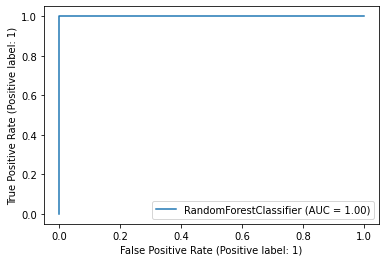

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,  accuracy_score, RocCurveDisplay
import itertools
RocCurveDisplay.from_estimator(model,X_train,Y_train)


**Visualising the Test set results**

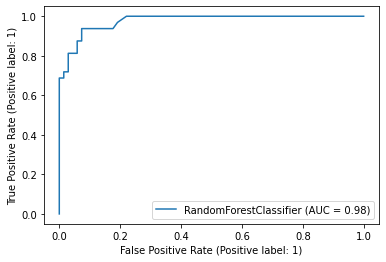

In [ ]:
RocCurveDisplay.from_estimator(model,X_test,Y_test)
